In [1]:
from TTreeHnBrowser import *
import matplotlib.pyplot as plt
%matplotlib inline
output_notebook()
#%matplotlib notebook

Welcome to JupyROOT 6.13/03


Loading BokehJS ...

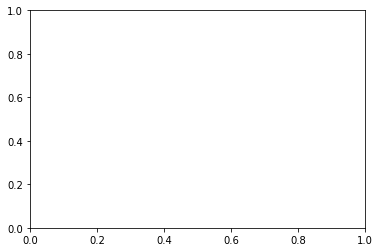

In [2]:
treeBrowser = TTreeHnBrowser()
out = widgets.Output()   
with out:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
#https://stackoverflow.com/questions/51601061/jupyter-notebook-duplicated-scatter-plot-using-when-using-ipywidgets
def updatePlot(change):
    # applyt slider query 
    df2=treeBrowser.sliderArray.queryDataFrame(treeBrowser.fDataFrame)    
    #print("New")
    out.clear_output()
    with out:
        for box in treeBrowser.drawVarArray.fDrawVarWidgets.children:
            plot=str(box.children[0].value)
            plots=plot.split(":")
            #print(plots[0],plots[1])
            y=df2[plots[0]]
            x=df2[plots[1]]
            plt.plot(x,y)
            plt.show() 

In [3]:
tree=ROOT.AliTreePlayer.LoadTrees("cat performance.list","(his.*)","xxx",".*","","")
ROOT.TStatToolkit.AddMetadata(tree,"mptCenter.Slider","(0:10:0.1)")
ROOT.TStatToolkit.AddMetadata(tree,"mptCenter.Hint","1/pt (GeV/c)")
ROOT.TStatToolkit.AddMetadata(tree,"thetaCenter.Slider","(-1:1:0.05)")
ROOT.TStatToolkit.AddMetadata(tree,"thetaCenter.Hint","pz/pt")
ROOT.TStatToolkit.AddMetadata(tree,"deltaphiCenter.Slider","(-1:1:0.1)")
ROOT.TStatToolkit.AddMetadata(tree,"deltaPhiCenter.Hint","delta sector")

<ROOT.THashList object ("metaTable") at 0x55c618822c70>

Info in <LoadTrees>: Load file	mapOutputEvent.root
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisITSOnElectronDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisTPCOnElectronDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisTRDOnElectronDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisITSOnPionDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisTPCOnPionDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisTRDOnPionDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisITSOnKaonDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisTPCOnKaonDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisTRDOnKaonDist:	40000	40000
Info in <InitMapTree>: hisITSOnElectronDist	mapOutputEvent.root.hisITSOnProtonDist:	40000	4

In [4]:
#tree=ROOT.AliTreePlayer.LoadTrees("cat mapLong.list","his.*_proj_0_1Dist","$#",".*","","")

In [5]:
treeBrowser.drawVarArray.addVariables(["hisTPCLossPionDist.mean:mptCenter", "hisTPCLossProtonDist.mean:mptCenter", "hisTPCLossKaonDist.mean:mptCenter", "hisTPCLossTritonDist.mean:mptCenter",])
treeBrowser.drawSelection.value="hisTPCLossKaonDist.entries>10"

In [6]:
treeBrowser.initTree(tree)   
#interact(updatePlot,treeBrowser.drawVarArray.fDrawVarWidgets.children[0].children[0])
treeBrowser.sliderArray.fSliderWidgets.children[0].children[0]
#interact(updatePlot,x=treeBrowser.sliderArray.fSliderWidgets.children[0].children[0])

FloatRangeSlider(value=(0.0, 10.0), description=u'mptCenter', layout=Layout(width=u'66%'), max=10.0)

In [7]:
#intplot=interactive(updatePlot,y=treeBrowser.sliderArray.fSliderWidgets.children[0].children[0])
treeBrowser.boxAll
#intplot

VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oVGV4dCh2YWx1ZT11Jy4qJywgZGVzY3JpcHRpb249dSdGcmllbmQgUmVnRXhwJyksIFRleHQodmFsdWU9dScuKicsIGRlc2NyaXB0aW9uPXXigKY=


In [8]:
#display(out)

In [9]:
out.layout.height='800px'
treeBrowser.sliderArray.fSliderWidgets.children[1].children[0].observe(updatePlot, names='value')
display(treeBrowser.sliderArray.fSliderWidgets.children[1].children[0])
display(treeBrowser.sliderArray.fSliderWidgets.children[2].children[0])
display(out)

RmxvYXRSYW5nZVNsaWRlcih2YWx1ZT0oLTEuMCwgMS4wKSwgZGVzY3JpcHRpb249dSd0aGV0YUNlbnRlcicsIGxheW91dD1MYXlvdXQod2lkdGg9dSc2NiUnKSwgbWF4PTEuMCwgbWluPS0xLjDigKY=


RmxvYXRSYW5nZVNsaWRlcih2YWx1ZT0oLTEuMCwgMS4wKSwgZGVzY3JpcHRpb249dSdkZWx0YXBoaUNlbnRlcicsIGxheW91dD1MYXlvdXQod2lkdGg9dSc2NiUnKSwgbWF4PTEuMCwgbWluPS3igKY=


Output(layout=Layout(height=u'800px'))

In [10]:
treeBrowser.fDataFrame.head(5)

AttributeError: 'int' object has no attribute 'head'

In [ ]:

output_notebook()
df2=treeBrowser.sliderArray.queryDataFrame(treeBrowser.fDataFrame)  
source = ColumnDataSource(data=treeBrowser.fDataFrame)

tools = ["box_select", "hover", "reset"]
#p = figure(plot_height=300, plot_width=300, tools=tools)
p = figure(plot_height=300, plot_width=600)
p.circle(x="thetaCenter", y="hisTPCLossPionDist.mean", size=3, hover_color="red", source=source)
show(gridplot([[p]]))

In [ ]:
plotArray=[]
#df2[plots[0]]
for box in treeBrowser.drawVarArray.fDrawVarWidgets.children:
    plot=str(box.children[0].value)
    plots=plot.split(":")
    p = figure(plot_height=300, plot_width=600)
    p.circle(x=plots[0], y=plots[1], size=3, hover_color="red", source=source)
    plotArray.append(p)
show(gridplot([plotArray]))    
    
    